In [ ]:
import os
for dirname, _, filenames in os.walk(r"C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\IQ-OTH_NCCD lung cancer dataset.txt
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (1).jpg
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (10).jpg
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (100).jpg
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (101).jpg
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (102).jpg
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (103).jpg
C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (104).jpg
C:\Users\a

In [ ]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
import os
import pandas as pd

benign_dirs = [r"C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases"]

Malignant_dir = [ r"C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Malignant cases"]

Normal_dirs = [r"C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Normal cases"]

filepaths = []
labels = []
dict_lists = [benign_dirs, Malignant_dir, Normal_dirs]
class_labels = ['benign', 'Malignant', 'Normal']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Lung_data = pd.concat([Fseries, Lseries], axis=1)
Lung_df = pd.DataFrame(Lung_data)
print(Lung_df.head())
print(Lung_df["labels"].value_counts())

                                           filepaths  labels
0  C:\Users\adity\Documents\Aditya RSET\Main Proj...  benign
1  C:\Users\adity\Documents\Aditya RSET\Main Proj...  benign
2  C:\Users\adity\Documents\Aditya RSET\Main Proj...  benign
3  C:\Users\adity\Documents\Aditya RSET\Main Proj...  benign
4  C:\Users\adity\Documents\Aditya RSET\Main Proj...  benign
labels
Malignant    561
Normal       416
benign       120
Name: count, dtype: int64


In [ ]:
Lung_df.shape

(1097, 2)

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images = train_test_split(Lung_df, test_size=0.3, random_state=40)
train_set, val_set = train_test_split(train_images, test_size=0.2, random_state=40
                                )

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(613, 2)
(330, 2)
(154, 2)
(767, 2)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train = image_gen.flow_from_dataframe(dataframe=train_set,
                                      x_col="filepaths",
                                      y_col="labels",
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=8,
                                      shuffle=False)

test = image_gen.flow_from_dataframe(dataframe=test_images,
                                     x_col="filepaths",
                                     y_col="labels",
                                     target_size=(224, 224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=8,
                                     shuffle=False)

val = image_gen.flow_from_dataframe(dataframe=val_set,
                                    x_col="filepaths",
                                    y_col="labels",
                                    target_size=(224, 224),
                                    color_mode='rgb',
                                    class_mode="categorical",
                                    batch_size=8,
                                    shuffle=False)

Found 613 validated image filenames belonging to 3 classes.
Found 330 validated image filenames belonging to 3 classes.
Found 154 validated image filenames belonging to 3 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['Malignant', 'Normal', 'benign']


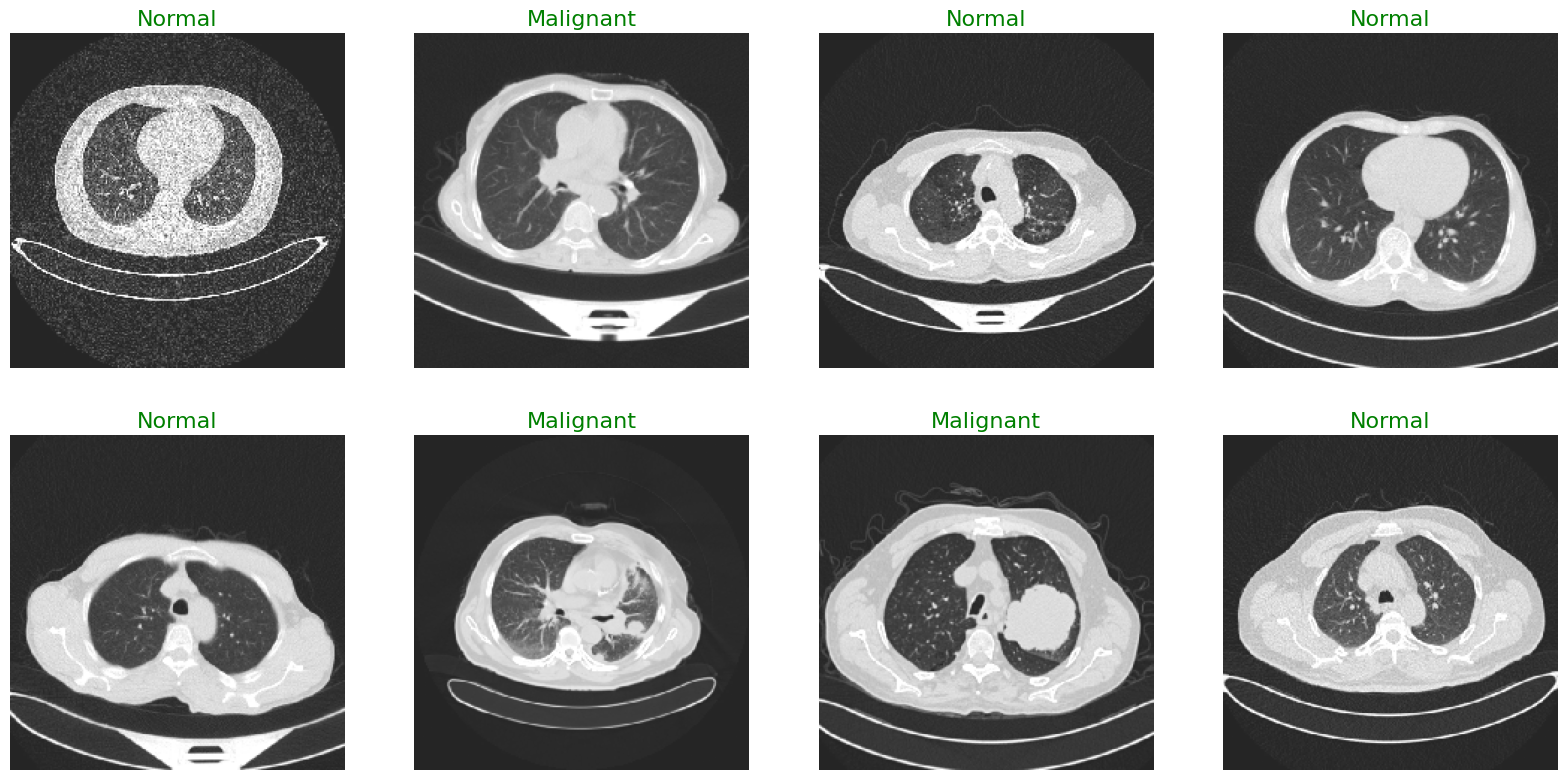

In [ ]:
import matplotlib.pyplot as plt

def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(4,4,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()
show_knee_images(train)

In [ ]:
from tensorflow.keras import layers, models, Input
import tensorflow as tf

def se_block(input_tensor, ratio=16):
    """Squeeze-and-Excitation (SE) Block for channel attention."""
    channels = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Dense(channels // ratio, activation='relu')(se)
    se = layers.Dense(channels, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, channels))(se)
    return layers.multiply([input_tensor, se])

def hybrid_block(x, filters):
    """Hybrid Block combining residual connections and concatenation."""
    # ResNet-style residual connection
    res = layers.Conv2D(filters, (1, 1), padding="same", activation='relu')(x)
    res = layers.BatchNormalization()(res)

    # DenseNet-style concatenation
    dense = layers.Conv2D(filters, (3, 3), padding="same", activation='relu')(x)
    dense = layers.BatchNormalization()(dense)
    dense = layers.concatenate([x, dense])

    # Match channels for addition
    dense = layers.Conv2D(filters, (1, 1), padding="same", activation='relu')(dense)
    dense = layers.BatchNormalization()(dense)

    # Combine residual and dense outputs
    return layers.Add()([res, dense])

def mixconv_layer(x, filters):
    """MixConv Layer for multi-kernel convolutions."""
    mix1 = layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(x)
    mix2 = layers.Conv2D(filters, (5, 5), padding="same", activation="relu")(x)
    return layers.concatenate([mix1, mix2], axis=-1)

# Input Layer
inputs = Input(shape=(224, 224, 3))

# First Convolution Block
x = layers.Conv2D(64, (5, 5), strides=(3, 3), activation='relu')(inputs)
x = layers.BatchNormalization()(x)

# Second Convolution Block
x = layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(3, 3))(x)

# SE Block
x = se_block(x)

# Hybrid Block
x = hybrid_block(x, 256)

# More Convolution Layers
x = layers.Conv2D(256, (1, 1), activation='relu', padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# MixConv Block
x = mixconv_layer(x, 256)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Fully Connected Layers
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# Output Layer
outputs = layers.Dense(3, activation='softmax')(x)

# Model Definition
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_26 (Conv2D)            │ (None, 74, 74, 64)        │           4,864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_16        │ (None, 74, 74, 64)        │             256 │ conv2d_26[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_27 (Conv2D)            │ (None, 74, 74, 128)       │          73,856 │ batch_normalization_16[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_17        │ (None, 74, 74, 128)       │             512 │ conv2d_27[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 24, 24, 128)       │               0 │ batch_normalization_17[0]… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_6    │ (None, 128)               │               0 │ max_pooling2d_4[0][0]      │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 8)                 │           1,032 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 128)               │           1,152 │ dense_17[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_6 (Reshape)           │ (None, 1, 1, 128)         │               0 │ dense_18[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_4 (Multiply)         │ (None, 24, 24, 128)       │               0 │ max_pooling2d_4[0][0],     │
│                               │                           │                 │ reshape_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_29 (Conv2D)            │ (None, 24, 24, 256)       │         295,168 │ multiply_4[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_19        │ (None, 24, 24, 256)       │           1,024 │ conv2d_29[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_9 (Concatenate)   │ (None, 24, 24, 384)       │               0 │ multiply_4[0][0],          │
│                               │                           │               

 Total params: 25,621,259 (97.74 MB)

 Trainable params: 25,616,779 (97.72 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [ ]:
history = model.fit(train, epochs=30, validation_data=val, verbose=1)

Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 474ms/step - accuracy: 0.5265 - loss: 1.9744 - val_accuracy: 0.1039 - val_loss: 1.1946
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 458ms/step - accuracy: 0.6976 - loss: 0.7509 - val_accuracy: 0.4610 - val_loss: 1.0807
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 457ms/step - accuracy: 0.8330 - loss: 0.4078 - val_accuracy: 0.4740 - val_loss: 1.4887
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 456ms/step - accuracy: 0.9065 - loss: 0.2709 - val_accuracy: 0.4740 - val_loss: 2.0296
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 457ms/step - accuracy: 0.9536 - loss: 0.1283 - val_accuracy: 0.5130 - val_loss: 1.7215
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 457ms/step - accuracy: 0.9750 - loss: 0.0798 - val_accuracy: 0.6299 - val_loss: 0.9041
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 467ms/step - accuracy: 0.9822 - loss: 0.0482 - val_accuracy: 0.8766 - val_loss: 0.3161
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 457ms/step - accuracy: 0.9973 - loss: 0.0200 - val_accu

In [ ]:
model.evaluate(test, verbose=1),
model.evaluate(train,verbose=1),
model.evaluate(val,verbose=1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9885 - loss: 0.0392
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 1.0000 - loss: 1.6562e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9907 - loss: 0.0343


[0.023425262421369553, 0.9935064911842346]

In [ ]:
model.save("Custom_final.h5")

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step


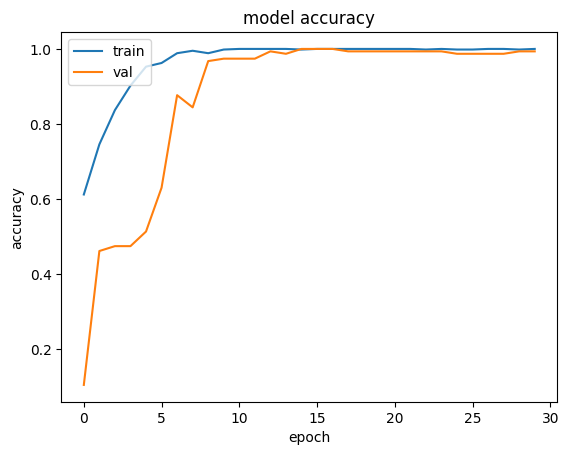

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

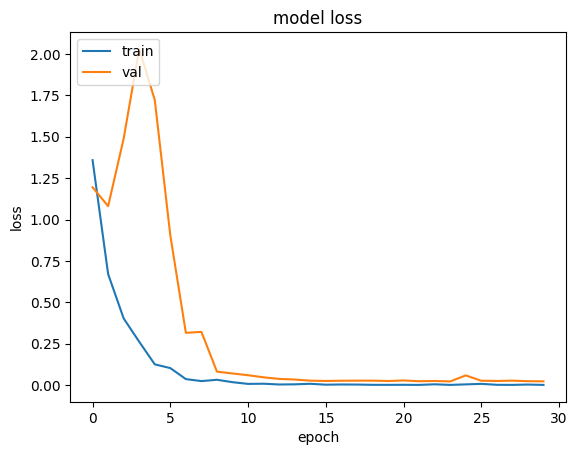

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

   Malignant       0.99      1.00      1.00       171
      Normal       0.98      0.98      0.98       121
      benign       0.97      0.92      0.95        38

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330

Accuracy of the Model: 98.5%


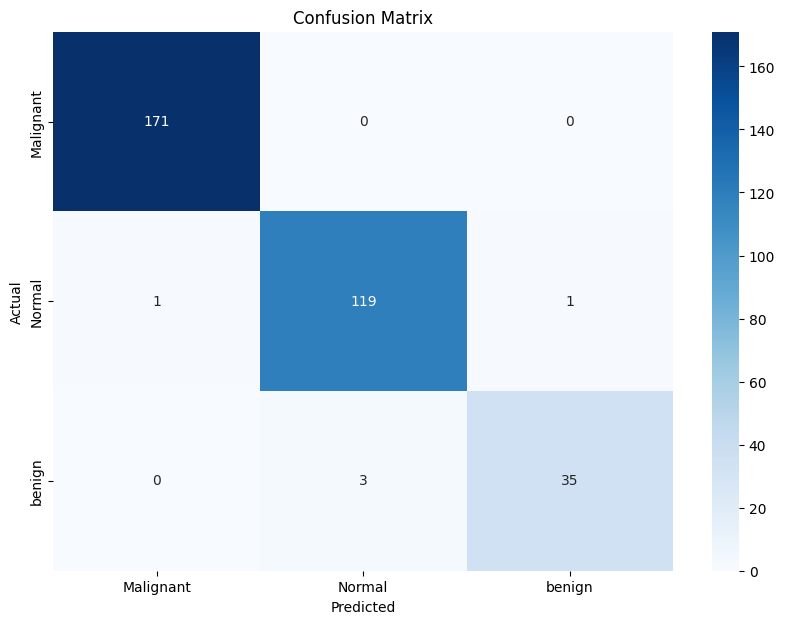

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Malignant', 'Normal', 'benign']

cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = r"C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (79).jpg" # Update this to your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size

# Convert the image to an array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image (same preprocessing as used during training)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Predict using the trained model
prediction = model.predict(img_array)
class_idx = np.argmax(prediction)  # Get the index of the predicted class
class_name = class_labels[class_idx]  # Convert index to class name

print(f"Predicted class: {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class: benign


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


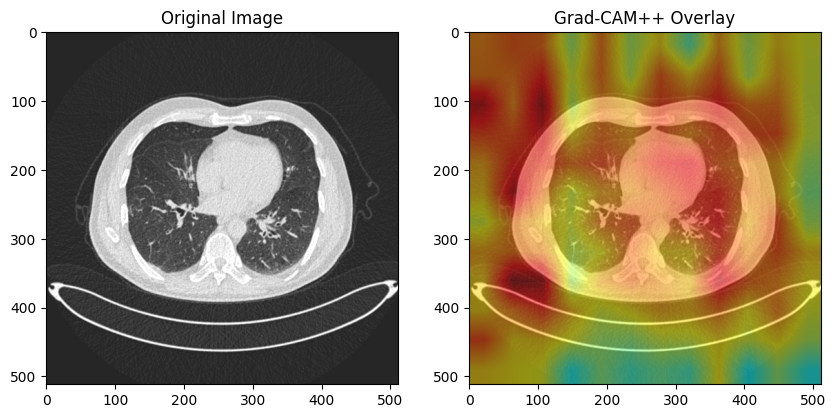

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):  # Use the target size of your CNN model
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)  # Resize to the appropriate input size of your model
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to generate Grad-CAM++ heatmap
def get_gradcam_plus_plus(model, img_array, layer_name, class_idx):
    grad_model = Model(inputs=[model.inputs], outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    first = tf.exp(loss) * grads
    second = tf.exp(loss) * grads**2
    third = tf.exp(loss) * grads**3

    global_sum = tf.reduce_sum(conv_outputs, axis=(0, 1, 2))

    alpha_num = second
    alpha_denom = 2 * second + third * global_sum
    alpha_denom = tf.where(alpha_denom != 0.0, alpha_denom, tf.ones_like(alpha_denom))

    alphas = alpha_num / alpha_denom
    weights = tf.reduce_sum(alphas * tf.nn.relu(grads), axis=(0, 1))
    activation_map = tf.reduce_sum(weights * conv_outputs, axis=-1).numpy()[0]

    # Apply a threshold to filter out less important areas
    heatmap = np.maximum(activation_map, 0)
    heatmap /= np.max(heatmap)  # Normalize to [0, 1]
    return heatmap

# Function to overlay heatmap on the original image
def overlay_heatmap(img_path, heatmap, intensity=0.5):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap to match image size
    heatmap = np.uint8(255 * heatmap)  # Convert heatmap to 255 scale
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply color map to the heatmap
    overlay = cv2.addWeighted(img, 1-intensity, heatmap, intensity, 0)  # Blend heatmap with original image
    return overlay

# Load the saved model
model = tf.keras.models.load_model('Custom_final.h5')  # Replace with your custom model path

# Set the image path (replace with the actual path)
img_path = r"C:\Users\adity\Documents\Aditya RSET\Main Project\2.0\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (10).jpg"  # Replace with your image path
img_array = preprocess_image(img_path)

# Get predictions from the model
predictions = model.predict(img_array)
class_idx = np.argmax(predictions[0])  # Class index with highest probability

# Specify the layer for Grad-CAM++ (change to the last convolutional layer in your model)
layer_name = 'conv2d_34'  # Change this to the last convolutional layer of your custom model

# Generate Grad-CAM++ heatmap
heatmap = get_gradcam_plus_plus(model, img_array, layer_name, class_idx)

# Overlay heatmap on the original image
overlay_img = overlay_heatmap(img_path, heatmap, intensity=0.5)

# Display the original image and the overlay image using matplotlib
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
original_img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Show the Grad-CAM++ overlay image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM++ Overlay")
plt.show()


In [ ]:
for layer in model.layers:
    print(layer.name)


input_layer_3
conv2d_26
batch_normalization_16
conv2d_27
batch_normalization_17
max_pooling2d_4
global_average_pooling2d_6
dense_17
dense_18
reshape_6
multiply_4
conv2d_29
batch_normalization_19
concatenate_9
conv2d_28
conv2d_30
batch_normalization_18
batch_normalization_20
add_6
conv2d_31
batch_normalization_21
conv2d_32
batch_normalization_22
max_pooling2d_5
conv2d_33
conv2d_34
concatenate_10
batch_normalization_23
max_pooling2d_6
flatten_1
dense_19
dropout_5
dense_20
dropout_6
dense_21


In [ ]:
import pydot
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
import visualkeras

# Visualize the model with layer names
visualkeras.layered_view(model, legend=True).show()
